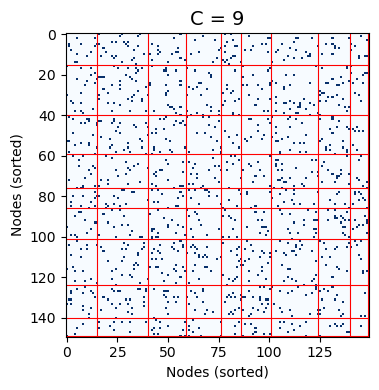

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_adj_matrix(adj, labels, C, cmap='Blues', figsize=(4,4)):
    """
    绘制按聚类排序后的邻接矩阵（带红色 cluster 分割线）

    参数：
    adj:      (N,N) 邻接矩阵（0/1 或权重）
    labels:   (N,) 每个节点对应的 cluster ID（从 0 到 C-1）
    C:        聚类个数
    """

    # 1. 按 cluster 排序节点顺序
    order = np.argsort(labels)
    adj_sorted = adj[order][:, order]
    labels_sorted = labels[order]

    # 2. 找出每个 cluster 的边界位置
    boundaries = []
    for c in range(C):
        idx = np.where(labels_sorted == c)[0]
        if len(idx) > 0:
            boundaries.append(idx[-1])

    # 3. 绘图
    plt.figure(figsize=figsize)
    plt.imshow(adj_sorted, cmap=cmap, interpolation='nearest')
    plt.title(f"C = {C}", fontsize=14)

    # 画红线
    for b in boundaries:
        plt.axhline(b, color='red', linewidth=0.8)
        plt.axvline(b, color='red', linewidth=0.8)

    plt.xlabel("Nodes (sorted)")
    plt.ylabel("Nodes (sorted)")
    plt.tight_layout()
    plt.show()


# ========== 示例使用 ==========

# 示例：随机稀疏网络
N = 150
np.random.seed(0)

# 生成邻接矩阵（稀疏）
adj = (np.random.rand(N, N) < 0.05).astype(int)
np.fill_diagonal(adj, 0)

# 假设有 9 个聚类
C = 9
labels = np.random.randint(0, C, size=N)

# 绘图
plot_clustered_adj_matrix(adj, labels, C)
